In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv(r'D:\TheCoder\Kaggle\datasets\ames\ames.csv')

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


In [5]:
features = ['YearBuilt', 'MoSold', 'ScreenPorch', 'LotArea']
#features = [col for col in df.columns]

col_ins_tranform=df.melt(id_vars='SalePrice', value_vars=features) #df.melt() if very important tranform from column to instance for certain purpose. Think about LOSSES MS
col_ins_tranform

,SalePrice,variable,value
0,215000,YearBuilt,1960.0
1,105000,YearBuilt,1961.0
2,172000,YearBuilt,1958.0
3,244000,YearBuilt,1968.0
4,189900,YearBuilt,1997.0
...,...,...,...
11715,142500,LotArea,7937.0
11716,131000,LotArea,8885.0
11717,132000,LotArea,10441.0
11718,170000,LotArea,10010.0


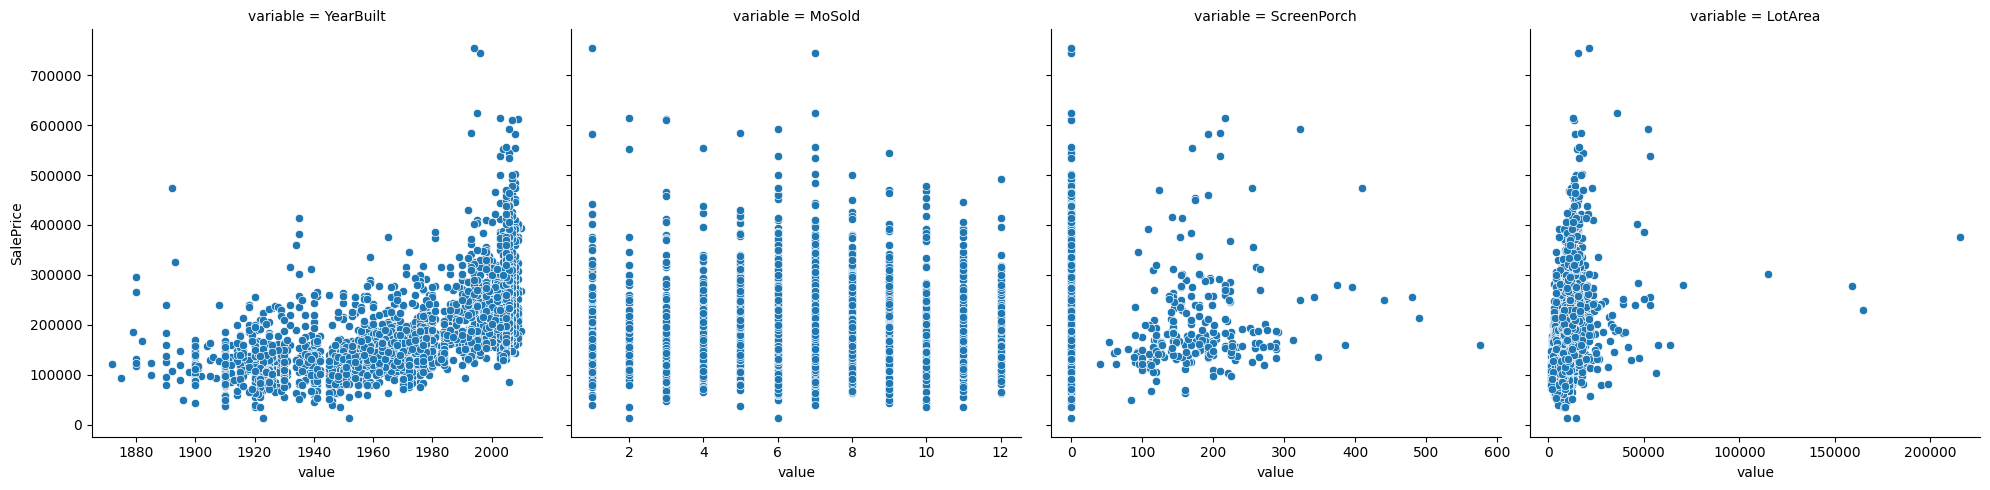

In [6]:
sns.relplot(
    x="value", y="SalePrice", col='variable', col_wrap=4, data=col_ins_tranform, facet_kws=dict(sharex=False),
);


__Based on above visualization:__
>Based on the plots, `YearBuilt` should have the highest `MI score` since knowing the year tends to constrain `SalePrice` to a smaller range of possible values. This is generally not the case for `MoSold`, however. Finally, since `ScreenPorch` is usually just one value, 0, on average it won't tell you much about `SalePrice` (though more than `MoSold`) .

**Based on above dataset:**
>The Ames dataset has seventy-eight features -- a lot to work with all at once! Fortunately, you can identify the features with the most potential.
>Use the `make_mi_scores` function (introduced in the tutorial) to compute mutual information scores for the Ames features:j>>
>

### 2. MUTUAL INFORMATION

In [7]:
X = df.copy()
y = X.pop('SalePrice')

In [8]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,120.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal


In [9]:
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']):
    X[col], _ = X[col].factorize()
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,0.0,0.0,0,0,-1,0.0,5,2010,0,0
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,120.0,0.0,0,1,-1,0.0,6,2010,0,0
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,12500.0,6,2010,0,0
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,0.0,0.0,0,0,-1,0.0,4,2010,0,0
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,0.0,0.0,0,1,-1,0.0,3,2010,0,0


In [10]:
discrete_values = X.dtypes == 'int64'
discrete_values

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold            True
YearSold          True
SaleType          True
SaleCondition     True
Length: 78, dtype: bool

In [11]:
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_values)
mi_scores = pd.Series(mi_scores, name='MI Scores', index = X.columns)
mi_scores_head = mi_scores.sort_values(ascending=False).head(20)
mi_scores_tail = mi_scores.sort_values(ascending=False).tail(20)
mi_scores_head

OverallQual     0.588624
Neighborhood    0.580575
GrLivArea       0.496591
YearBuilt       0.439171
GarageArea      0.415404
TotalBsmtSF     0.393418
GarageCars      0.385422
FirstFlrSF      0.372534
BsmtQual        0.369183
ExterQual       0.333282
KitchenQual     0.326458
YearRemodAdd    0.319576
MSSubClass      0.295903
GarageFinish    0.265596
FullBath        0.259914
LotFrontage     0.231031
Foundation      0.230289
FireplaceQu     0.229075
GarageType      0.221540
SecondFlrSF     0.212530
Name: MI Scores, dtype: float64

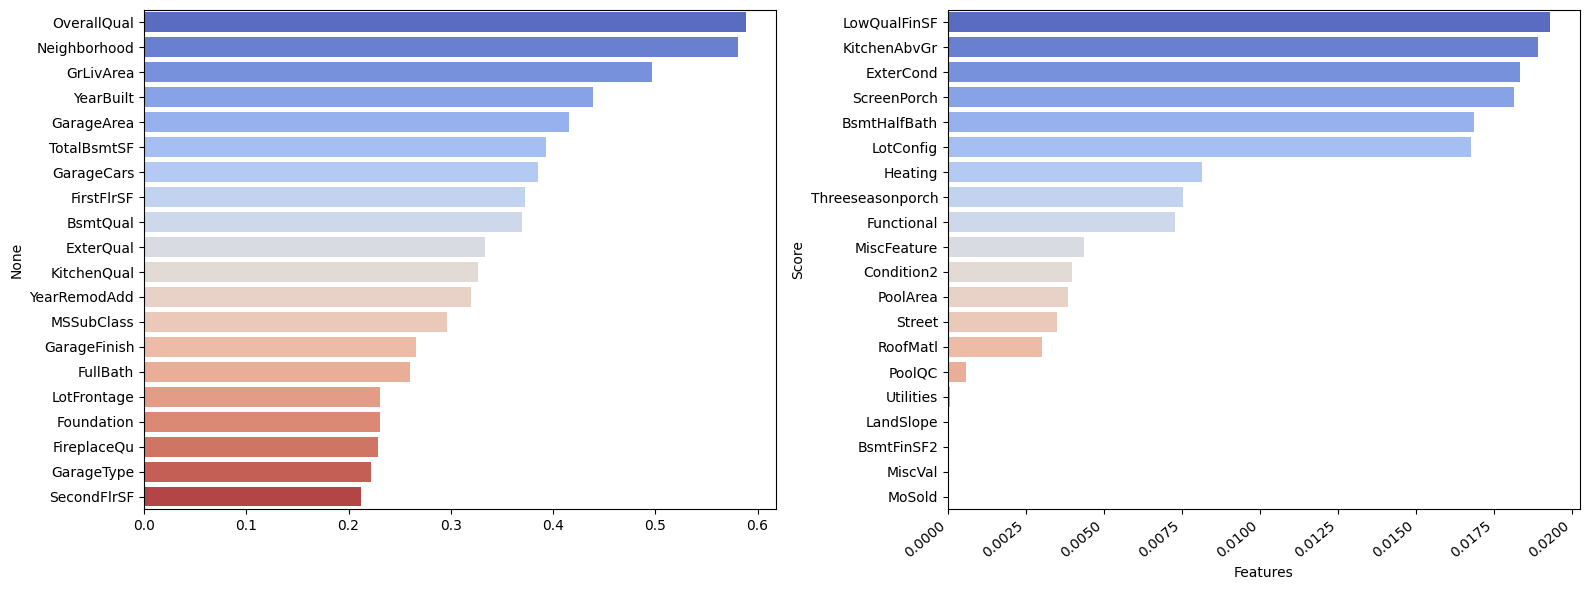

In [13]:
# Membuat Subplot untuk jumlah missing values dan persentase missing values

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot 1 - head (20)
sns.barplot(x=mi_scores_head.values, y=mi_scores_head.index, hue=mi_scores_head.index, palette='coolwarm', ax=axes[0])
plt.xticks(rotation=40, ha='right')
plt.xlabel('Features')
plt.ylabel('Score')

# plot 2 - tail (20)
sns.barplot(x=mi_scores_tail.values, y=mi_scores_tail.index, hue=mi_scores_tail.index, palette='coolwarm', ax=axes[1])
plt.xticks(rotation=40, ha='right')
plt.xlabel('Features')
plt.ylabel('Score')

# show all plots
plt.tight_layout()
plt.show()

**Some common themes among most of these features are:**
>Location: `Neighborhood`<br>
>Size: all of the `Area` and `SF` features, and counts like `FullBath` and `GarageCars`<br>
>Quality: all of the `Qual` `features`<br>
>Year: `YearBuilt` and `YearRemodAdd`<br>
>Types: descriptions of features and styles like `Foundation` and `GarageType`

These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our `mutual` `information` `metric` `scored` them `highly`. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer.

**Let's see the correlation of Building Types and Sales Price (Linear Regression)**

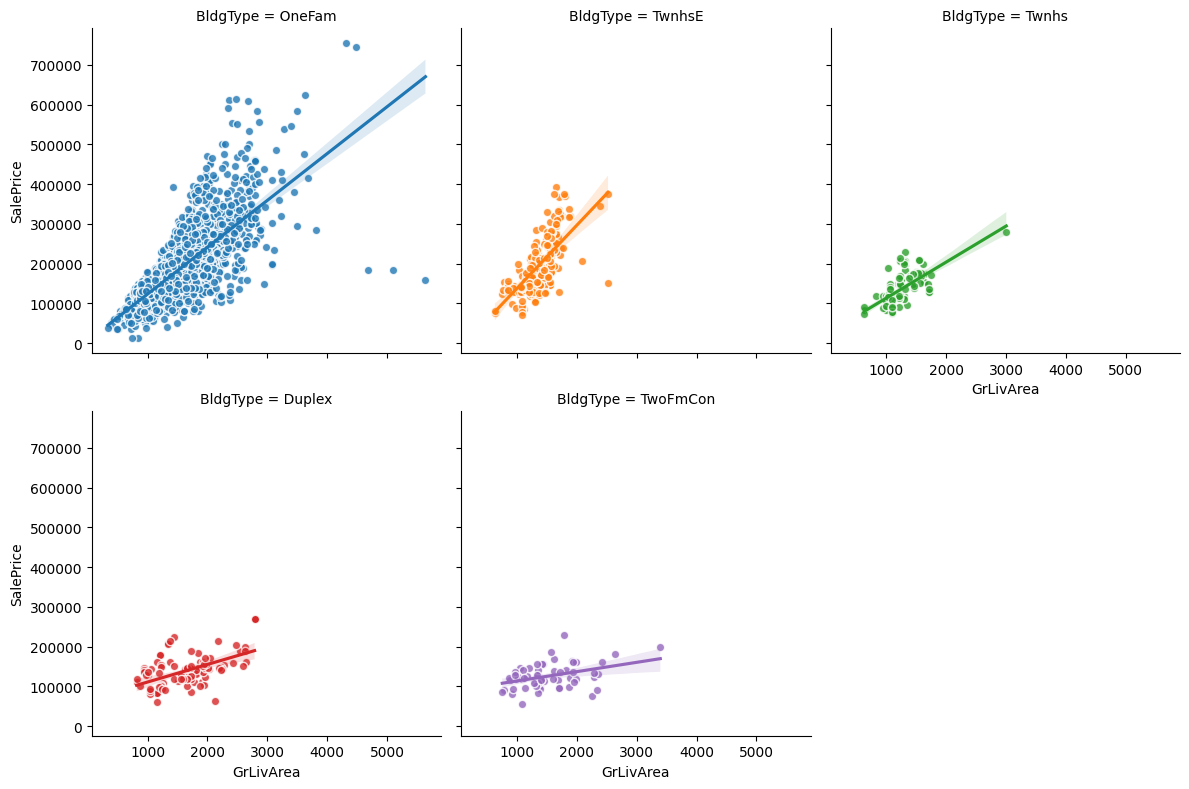

In [ ]:
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

**INTERPRETATION:**
>This code uses `Seaborn` to create a `linear` `regression` `plot` (lmplot) that shows the relationship between `GrLivArea` (above-ground living area) and `SalePrice` (home sale price), 
>by segmenting the data by BldgType (building type).


The trends lines within each category of `BldgType` are clearly very different, indicating an interaction between these features. Since knowing `BldgType` tells us more about how `GrLivArea` relates to `SalePrice`, we should consider including `BldgType` in our feature set.

The trend lines for `MoSold`, however, are almost all the same. This feature hasn't become more informative for knowing `BldgType`.

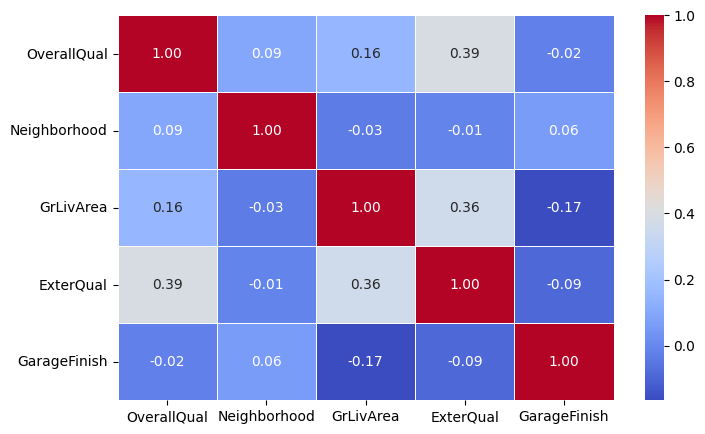

In [ ]:
# Select the first 5 columns
selected_columns = ['OverallQual', 'Neighborhood', 'GrLivArea', 'ExterQual', 'GarageFinish']
#X_corr_subset = X.iloc[:, :5].corr()
X_corr_subset = X[selected_columns].corr()
plt.figure(figsize=(8,5))
sns.heatmap(X_corr_subset, annot=True, fmt='.2f', cmap='coolwarm', linewidths='0.5')
plt.show()